In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [2]:
def uni_rosenbrok(f, u0, alpha, t, G, autonomous = 0):
    h = 10**-5
    u =  [u0]
    fu = np.zeros((len(u0), len(u0)))
    for i in range(len(t) - 1):
        tau = t[i + 1] - t[i]
        for j in range(len(u0)):
            for k in range(len(u0)):
                du = np.zeros((len(u0), 1))
                du[j] = h
                if autonomous:
                    fu[j][k] = ((f(u[i] + du) - f(u[i] - du)) / (2*h)) [k][0]
                else:
                    fu[j][k] = ((f(u[i] + du, t[i]) - f(u[i] - du, t[i])) / (2*h)) [k][0]
        if autonomous:
            w = np.linalg.solve((G - alpha * tau * fu.T), f(u[i]))
        else:
            w = np.linalg.solve((G - alpha * tau * fu.T), f(u[i], t[i] + tau/2))
        u.append(u[i] + tau * np.real(w))
    return u

def effective_p(U2, U1, U0, r):
    return np.log((U2 - U1) / (U1 - U0)) / np.log(r)

In [3]:
r0 = 1000
r1 = 9000
r2 = r1
r3 = r1
r4 = r1
r5 = r1
c1 = 1e-6
c2 = 2e-6
c3 = 3e-6
ub = 6

u0 = np.array([[0], [ub * r1 / (r1 + r2)], [ub * r1 / (r1 + r2)], [ub], [0]])
G = np.array([[-c1, c1, 0, 0, 0], [c1, -c1, 0, 0, 0], [0, 0, -c2, 0, 0], [0, 0, 0, -c3, c3], [0, 0, 0, c3, -c3]])

def ue(t):
    return 0.1 * np.sin(200 * np.pi * t)

def ff(u):
    return 1e-6 * (np.exp(u / 0.026) - 1)

def F(u, t):
    return np.array([[u[0][0] / r0 - ue(t) / r0], 
                     [0.01 * ff(u[1][0] - u[2][0]) - ub / r2 + u[1][0] * (1 / r1 + 1 / r2)],
                     [u[2][0] / r3 - ff(u[1][0] - u[2][0])], 
                     [0.99 * ff(u[1][0] - u[2][0]) - ub / r4 + u[3][0] / r4], 
                     [u[4][0] / r5]])

In [4]:
h = 1 / 5000
border = (0, 0.3)
num_of_intervals = int((border[1] - border[0]) / h)
t = np.linspace(border[0], border[1], num_of_intervals + 1)

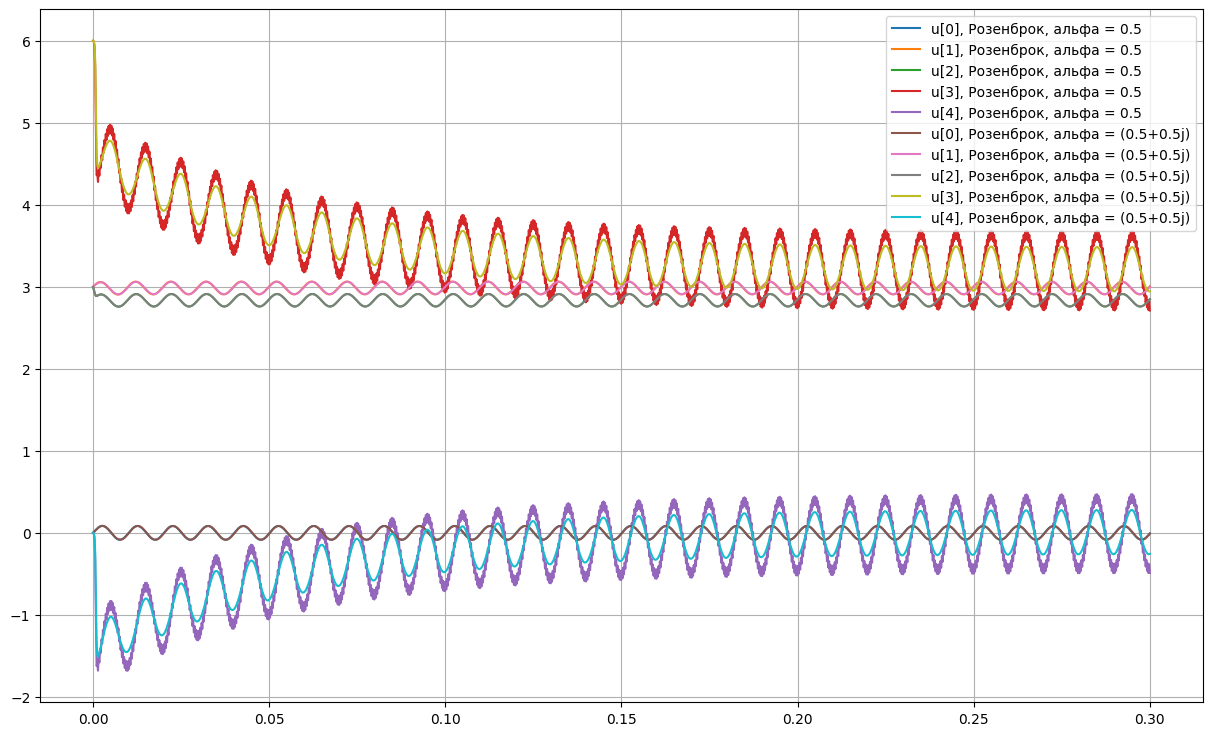

In [5]:
plt.figure(figsize=(15, 9))
alphas = [1/2, (1 + 1j) / 2]
for alpha in alphas:
    u = uni_rosenbrok(F, u0, alpha, t, G)
    for i in range(len(u0)):
        plt.plot(t, [sol[i][0] for sol in u], label=f"u[{i}], Розенброк, альфа = {alpha}")
plt.legend()
plt.grid(True)

Первые 3 решения визуально совпадают для различных альфа.

In [6]:
border = (0, 0.01)
nums_of_intervals = [2 ** i for i in range(10, 13)]
U = []
for alpha in alphas:
    U.append([])
    for n in nums_of_intervals:
        t = np.linspace(border[0], border[1], n + 1)
        U[-1].append(uni_rosenbrok(F, u0, alpha, t, G))

[[-1.99291039]
 [-2.01467145]
 [-1.99938739]
 [-1.99007234]
 [-1.99006799]]


/tmp/ipykernel_3604/4073343803.py:23: RuntimeWarning: invalid value encountered in divide
  return np.log((U2 - U1) / (U1 - U0)) / np.log(r)
/tmp/ipykernel_3604/4073343803.py:23: RuntimeWarning: invalid value encountered in log
  return np.log((U2 - U1) / (U1 - U0)) / np.log(r)


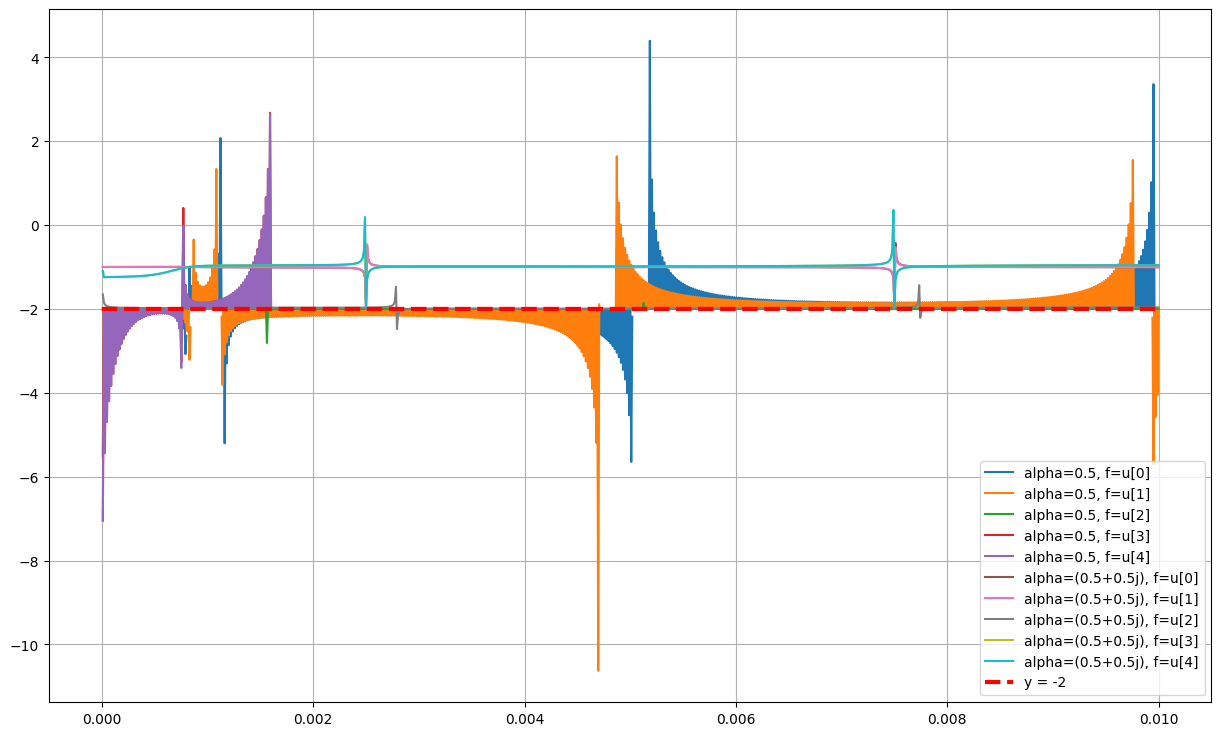

In [7]:
# порядок метода в последней точке для каждой из 5 функций
p = effective_p(U[0][2][-1], U[0][1][-1], U[0][0][-1], 2)
print(p)

t = np.linspace(border[0], border[1], nums_of_intervals[0] + 1)
plt.figure(figsize=(15, 9))
for i in range(len(alphas)):
    for j in range(len(u0)):
        plt.plot(t, [effective_p(U[i][2][4 * k][j], U[i][1][2 * k][j], U[i][0][k][j], 2) for k in range(nums_of_intervals[0] + 1)], label=f"alpha={alphas[i]}, f=u[{j}]")
plt.plot(t, [-2 for i in range(nums_of_intervals[0] + 1)], linewidth=3, linestyle="--", color="r", label="y = -2")
plt.legend()
plt.grid(True)

In [8]:
u0_a = np.array([[0], [ub*r1/(r1+r2)], [ub*r1/(r1+r2)], [ub], [0],[0]])

G_a = np.array([[-c1, c1, 0, 0, 0, 0], [c1, -c1, 0, 0, 0, 0], [0, 0, -c2, 0, 0, 0], [0, 0, 0, -c3, c3, 0],
               [0, 0, 0, c3, -c3, 0], [0, 0, 0, 0, 0, 1]])

def F_a(u):
    return np.array([[u[0][0] / r0 - ue(u[5][0]) / r0],
                       [0.01 * ff(u[1][0] - u[2][0]) - ub / r2 + u[1][0] * (1 / r1 + 1 / r2) ],
                       [u[2][0] / r3 - ff(u[1][0] - u[2][0])],
                       [0.99 * ff(u[1][0] - u[2][0]) - ub / r4 + u[3][0] / r4],
                       [u[4][0] / r5],
                       [1]])

In [9]:
U_a = []
for alpha in alphas:
    U_a.append([])
    for n in nums_of_intervals:
        t = np.linspace(border[0], border[1], n + 1)
        U_a[-1].append(uni_rosenbrok(F_a, u0_a, alpha, t, G_a, 1))

/tmp/ipykernel_3604/4073343803.py:23: RuntimeWarning: invalid value encountered in divide
  return np.log((U2 - U1) / (U1 - U0)) / np.log(r)
/tmp/ipykernel_3604/4073343803.py:23: RuntimeWarning: invalid value encountered in log
  return np.log((U2 - U1) / (U1 - U0)) / np.log(r)


[[-1.99795274]
 [-2.00035866]
 [-2.02829515]
 [-1.99627725]
 [-1.99623475]
 [        nan]]


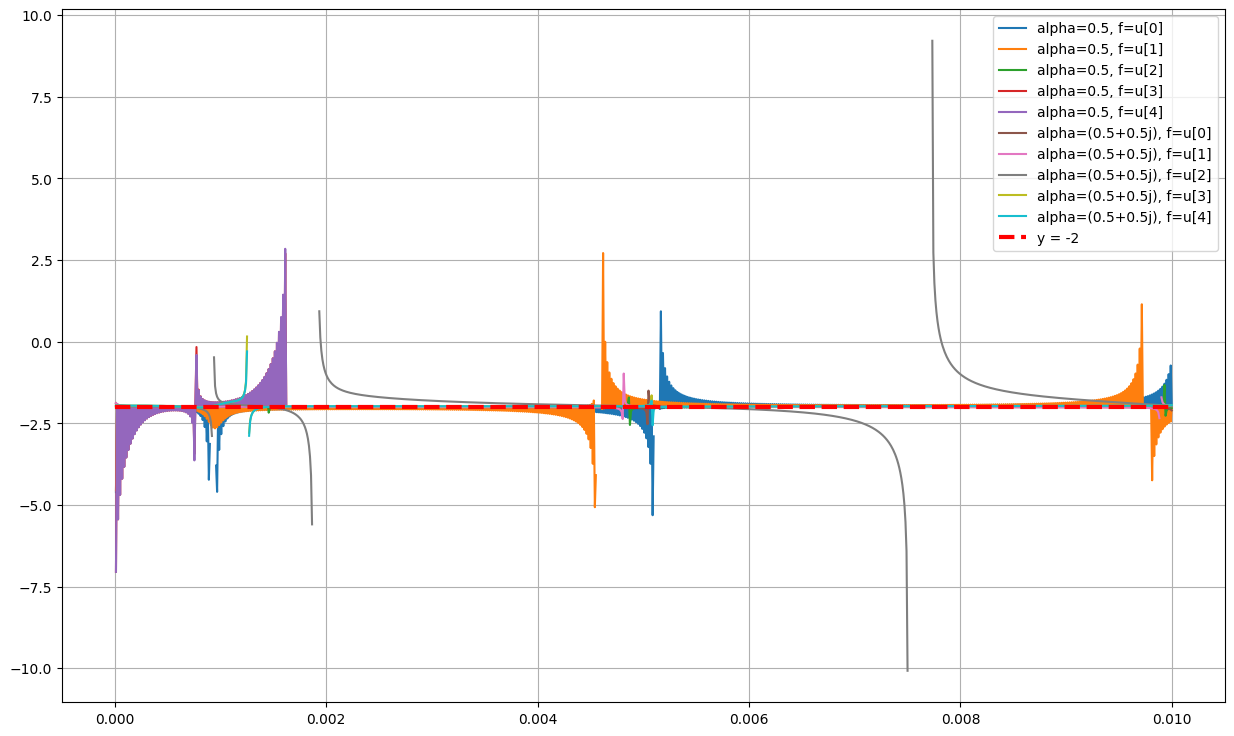

In [10]:
# порядок метода в последней точке для каждой из 5 функций
p = effective_p(U_a[0][2][-1], U_a[0][1][-1], U_a[0][0][-1], 2)
print(p)

t = np.linspace(border[0], border[1], nums_of_intervals[0] + 1)
plt.figure(figsize=(15, 9))
for i in range(len(alphas)):
    for j in range(len(u0)):
        plt.plot(t, [effective_p(U_a[i][2][4 * k][j], U_a[i][1][2 * k][j], U_a[i][0][k][j], 2) for k in range(nums_of_intervals[0] + 1)], label=f"alpha={alphas[i]}, f=u[{j}]")
plt.plot(t, [-2 for i in range(nums_of_intervals[0] + 1)], linewidth=3, linestyle="--", color="r", label="y = -2")
plt.legend()
plt.grid(True)